Dibuat oleh Nickolaus Satria Bagaskara

Import Library

In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)

2.5.0


Download dataset

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-25 15:09:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.48MB/s    in 74s     

2021-06-25 15:11:04 (4.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract dataset

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Making new folder for split train and validation

In [ ]:
import  shutil

In [ ]:
dir = os.path.join('/tmp/rockpaperscissors/latih')
if not os.path.exists(dir):
    os.mkdir(dir)
else:
    shutil.rmtree(dir)
    os.mkdir(dir)
dir = os.path.join('/tmp/rockpaperscissors/cek')
if not os.path.exists(dir):
    os.mkdir(dir)
else:
    shutil.rmtree(dir)
    os.mkdir(dir)
os.mkdir('/tmp/rockpaperscissors/latih/rock')
os.mkdir('/tmp/rockpaperscissors/latih/scissors')
os.mkdir('/tmp/rockpaperscissors/latih/paper')
os.mkdir('/tmp/rockpaperscissors/cek/rock')
os.mkdir('/tmp/rockpaperscissors/cek/scissors')
os.mkdir('/tmp/rockpaperscissors/cek/paper')
os.listdir('/tmp/rockpaperscissors')

['rock',
 'cek',
 'README_rpc-cv-images.txt',
 'paper',
 'latih',
 'scissors',
 'rps-cv-images']

split data for train and validation

In [ ]:
from sklearn.model_selection import train_test_split

rock_train, rock_test = train_test_split(os.listdir('/tmp/rockpaperscissors/rock'), test_size=0.40, random_state=1010)
scissors_train, scissors_test = train_test_split(os.listdir('/tmp/rockpaperscissors/scissors'), test_size=0.40, random_state=1010)
paper_train, paper_test = train_test_split(os.listdir('/tmp/rockpaperscissors/paper'), test_size=0.40, random_state=1010)
[shutil.copy('/tmp/rockpaperscissors/rock/'+num, '/tmp/rockpaperscissors/latih/rock/'+num)for num in rock_train]
[shutil.copy('/tmp/rockpaperscissors/rock/'+num, '/tmp/rockpaperscissors/cek/rock/'+num)for num in rock_test]
[shutil.copy('/tmp/rockpaperscissors/scissors/'+num, '/tmp/rockpaperscissors/latih/scissors/'+num)for num in scissors_train]
[shutil.copy('/tmp/rockpaperscissors/scissors/'+num, '/tmp/rockpaperscissors/cek/scissors/'+num)for num in scissors_test]
[shutil.copy('/tmp/rockpaperscissors/paper/'+num, '/tmp/rockpaperscissors/latih/paper/'+num)for num in paper_train]
[shutil.copy('/tmp/rockpaperscissors/paper/'+num, '/tmp/rockpaperscissors/cek/paper/'+num)for num in paper_test]

['/tmp/rockpaperscissors/cek/paper/1Frbe8cdOdkciOBg.png',
 '/tmp/rockpaperscissors/cek/paper/eBU0DmyWZu3WLjSO.png',
 '/tmp/rockpaperscissors/cek/paper/C7zCG474LseZgn8o.png',
 '/tmp/rockpaperscissors/cek/paper/sisDkUJdIN7AkgTV.png',
 '/tmp/rockpaperscissors/cek/paper/TYjJigXjEyiVntzx.png',
 '/tmp/rockpaperscissors/cek/paper/K6IACWoiTOnGR9Np.png',
 '/tmp/rockpaperscissors/cek/paper/Ht08RX3DQCSdl9Sy.png',
 '/tmp/rockpaperscissors/cek/paper/VD4twqBeFDIHSovy.png',
 '/tmp/rockpaperscissors/cek/paper/JRZTPL2YQ6cfIMh9.png',
 '/tmp/rockpaperscissors/cek/paper/AYfr1pZxmZyZaXWu.png',
 '/tmp/rockpaperscissors/cek/paper/JZ8KCFK6y0Zd87Xl.png',
 '/tmp/rockpaperscissors/cek/paper/C3j6RdTEo4jf6Cr4.png',
 '/tmp/rockpaperscissors/cek/paper/zBMp6VflTDyfCqa6.png',
 '/tmp/rockpaperscissors/cek/paper/pUCjvjdpH5HSaWxl.png',
 '/tmp/rockpaperscissors/cek/paper/5kJec3v9txvrAb4g.png',
 '/tmp/rockpaperscissors/cek/paper/wBUGgxpeb0gggcTx.png',
 '/tmp/rockpaperscissors/cek/paper/7UoLr02FuYuLrJxz.png',
 '/tmp/rockpap

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/latih',  
        target_size=(150, 150),  
        batch_size=4,
        class_mode ='categorical'     )
 
validation_generator = test_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/cek', 
        target_size=(150, 150), 
        batch_size=4,
        class_mode ='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Making tf layer configuration for training the dataset

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

Training process

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=24, 
      epochs=150, 
      validation_data=validation_generator, 
      validation_steps=8, 
      verbose=2)


Epoch 1/150
24/24 - 4s - loss: 0.2328 - accuracy: 0.9271 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 2/150
24/24 - 4s - loss: 0.2514 - accuracy: 0.8958 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 3/150
24/24 - 4s - loss: 0.1627 - accuracy: 0.9479 - val_loss: 0.0651 - val_accuracy: 0.9688
Epoch 4/150
24/24 - 4s - loss: 0.1747 - accuracy: 0.9479 - val_loss: 0.1786 - val_accuracy: 0.9062
Epoch 5/150
24/24 - 4s - loss: 0.0742 - accuracy: 0.9688 - val_loss: 0.0995 - val_accuracy: 1.0000
Epoch 6/150
24/24 - 4s - loss: 0.2338 - accuracy: 0.9375 - val_loss: 0.2036 - val_accuracy: 0.8750
Epoch 7/150
24/24 - 4s - loss: 0.1591 - accuracy: 0.9688 - val_loss: 0.1200 - val_accuracy: 0.9375
Epoch 8/150
24/24 - 4s - loss: 0.2681 - accuracy: 0.8854 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 9/150
24/24 - 4s - loss: 0.3133 - accuracy: 0.9167 - val_loss: 0.1991 - val_accuracy: 0.9375
Epoch 10/150
24/24 - 4s - loss: 0.2235 - accuracy: 0.9167 - val_loss: 0.1741 - val_accuracy: 0.9375
Epoch 11/

Testing

Saving batu (2).png to batu (2).png
Saving batu.png to batu.png
Saving gunting (2).png to gunting (2).png
Saving gunting.png to gunting.png
Saving kertas (2).png to kertas (2).png
Saving kertas.png to kertas.png
[[0. 1. 0.]]
rock
[[0. 1. 0.]]
rock
[[0. 0. 1.]]
scissors
[[0. 0. 1.]]
scissors
[[1. 0. 0.]]
papper
[[1. 0. 0.]]
papper


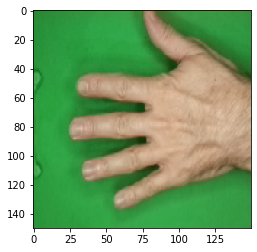

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(classes)
  if classes[0][0]==1:
    print('papper')
  if classes[0][1]==1:
    print('rock')
  if classes[0][2]==1:
    print('scissors')